<a href="https://colab.research.google.com/github/FernandoFrancoF/IA/blob/main/LogicaDifusa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=b6f53ef7ded97ed4b064873921a2b3449ab8792c012cab3dac8c5ff63c11b0c7
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Calidad de la comida (0-10): 2
Calidad del servicio (0-10): 7
Calidad total: 4.66060606060606


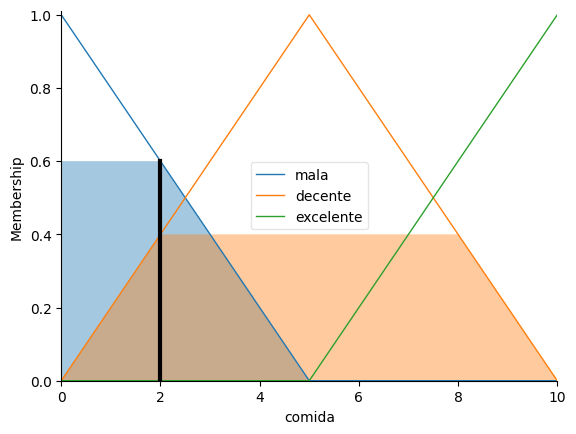

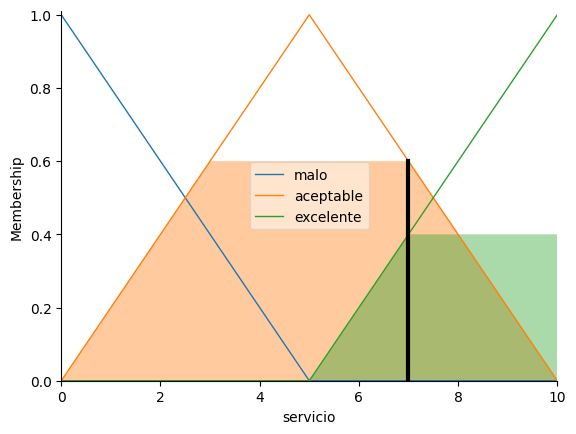

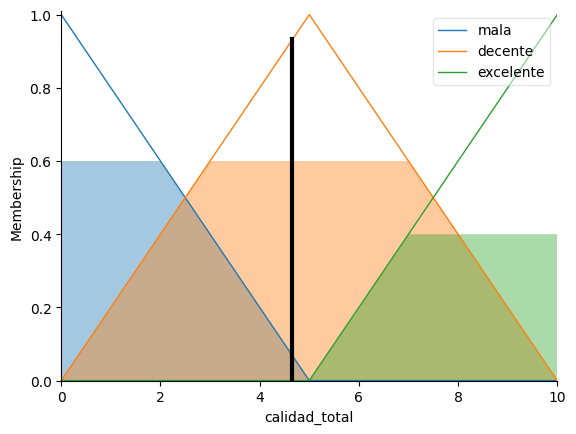

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variables lingüísticas
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')
calidad_total = ctrl.Consequent(np.arange(0, 11, 1), 'calidad_total')

# Conjuntos difusos para Comida
comida['mala'] = fuzz.trimf(comida.universe, [0, 0, 5])
comida['decente'] = fuzz.trimf(comida.universe, [0, 5, 10])
comida['excelente'] = fuzz.trimf(comida.universe, [5, 10, 10])

# Conjuntos difusos para Servicio
servicio['malo'] = fuzz.trimf(servicio.universe, [0, 0, 5])
servicio['aceptable'] = fuzz.trimf(servicio.universe, [0, 5, 10])
servicio['excelente'] = fuzz.trimf(servicio.universe, [5, 10, 10])

# Conjuntos difusos para Calidad Total
calidad_total['mala'] = fuzz.trimf(calidad_total.universe, [0, 0, 5])
calidad_total['decente'] = fuzz.trimf(calidad_total.universe, [0, 5, 10])
calidad_total['excelente'] = fuzz.trimf(calidad_total.universe, [5, 10, 10])

# Reglas difusas
rule1 = ctrl.Rule(comida['mala'] | servicio['malo'], calidad_total['mala'])
rule2 = ctrl.Rule(servicio['aceptable'], calidad_total['decente'])
rule3 = ctrl.Rule(servicio['excelente'] | comida['excelente'], calidad_total['excelente'])
rule4 = ctrl.Rule(comida['mala'] & servicio['excelente'], calidad_total['decente'])
rule5 = ctrl.Rule(comida['excelente'] & servicio['malo'], calidad_total['decente'])

calidad_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
calidad_simulation = ctrl.ControlSystemSimulation(calidad_system)

# Entrada del usuario
comida_input = float(input("Calidad de la comida (0-10): "))
servicio_input = float(input("Calidad del servicio (0-10): "))

calidad_simulation.input['comida'] = comida_input
calidad_simulation.input['servicio'] = servicio_input

# Calcular y mostrar resultado
calidad_simulation.compute()
print("Calidad total:", calidad_simulation.output['calidad_total'])

# Mostrar gráficos
comida.view(sim=calidad_simulation)
servicio.view(sim=calidad_simulation)
calidad_total.view(sim=calidad_simulation)

plt.show()